In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Ler o data set,

Ter uma visão geral dos atributos e da classe

8 Atributos e 1 classe binária -> M ou B (será convertida para 0 ou 1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Prostate_Cancer.csv')
df.head(5)

Mounted at /content/drive


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
#entradas e tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
#existem valores faltantes?
df.isna().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [5]:
#convertendo a classe para 0 ou 1
df=df.replace({'diagnosis_result':{'M':0,'B':1}})

In [6]:
df['diagnosis_result']

0     0
1     1
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Name: diagnosis_result, Length: 100, dtype: int64

In [7]:
#retirar a coluna ID
df = df.drop(['id'],axis=1)

In [8]:
df.head(3)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0,23,12,151,954,0.143,0.278,0.242,0.079
1,1,9,13,133,1326,0.143,0.079,0.181,0.057
2,0,21,27,130,1203,0.125,0.160,0.207,0.060


In [9]:
#valores minimos de cada coluna
df.min()

diagnosis_result       0.000
radius                 9.000
texture               11.000
perimeter             52.000
area                 202.000
smoothness             0.070
compactness            0.038
symmetry               0.135
fractal_dimension      0.053
dtype: float64

In [10]:
#valores maximos de cada coluna
df.max()

diagnosis_result        1.000
radius                 25.000
texture                27.000
perimeter             172.000
area                 1878.000
smoothness              0.143
compactness             0.345
symmetry                0.304
fractal_dimension       0.097
dtype: float64

<AxesSubplot:>

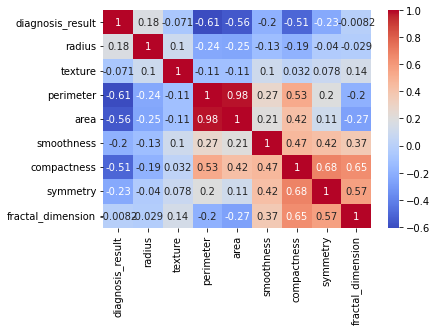

In [11]:
# computar a matriz de correlacao
import seaborn as sns

corr = df.corr()

# Plotar a matriz como um mapa de calor
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [27]:
#normalizar entre 0 e 1 os atributos
scaler = MinMaxScaler()
df[['radius', 'texture', 'area', 'smoothness','compactness','symmetry','fractal_dimension']] = scaler.fit_transform(df[['radius', 'texture','area', 'smoothness','compactness','symmetry','fractal_dimension']])
df.tail()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,0,0.8750,0.3125,0.666667,0.633652,0.287671,0.302932,0.443787,0.068182
96,1,0.8125,0.1875,0.216667,0.148568,0.479452,0.107492,0.325444,0.295455
97,1,0.6250,1.0000,0.083333,0.055489,0.438356,0.048860,0.000000,0.363636
98,1,0.7500,0.8125,0.183333,0.125895,0.273973,0.120521,0.159763,0.295455
99,0,0.4375,1.0000,0.350000,0.263126,0.383562,0.247557,0.313609,0.250000


In [28]:
#Separar entre x e y
x = df[['radius', 'texture','area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
y = df['diagnosis_result']

In [14]:
#dividir entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
# hyperparameters for Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
#Possible hyperparameters
param_grid = {
    'n_estimators': [10, 30 ,50, 100, 200,300],
    'max_depth': [1, 5, 10, 20,30,40],
    'min_samples_split': [2, 4, 6, 8,10,15],
    'min_samples_leaf': [1, 2, 3,5,7],
    'max_features': ['sqrt', 'log2', None]
}

classifier = RandomForestClassifier(random_state=0)

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(classifier, param_grid=param_grid, scoring=scorer)


grid_search.fit(X_train, y_train)

# Avalia o modelo com o dataset de teste
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest >>>>> Best params: {grid_search.best_params_}, Accuracy: {accuracy:.2f}")

Random Forest >>>>> Best params: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 30}, Accuracy: 0.80


In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0,max_depth = 1,min_samples_leaf = 7,min_samples_split = 2)
# Train classifier on training data
classifier.fit(X_train, y_train)

# Evaluate classifier on testing data
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Random Forest >>>>> Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")


Random Forest >>>>> Accuracy: 0.80, Precision: 0.82, Recall: 0.77, F1-score: 0.78


In [30]:
#hyperparameters determination for naive bayes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

classifier = GaussianNB()

#values to be tested as var smoothing
param_grid = {'var_smoothing': [0,1e-100,1e-25,1e-20,1e-15,1e-13,1e-11,1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print("Best parameters: ", grid_search.best_params_)
print(f"Accuracy: {accuracy:.2f}")



Best parameters:  {'var_smoothing': 0}
Accuracy: 0.84


In [32]:


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(var_smoothing = 0)

# Train classifier on training data
classifier.fit(X_train, y_train)

# Evaluate classifier on testing data
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Naive Bayes >>>>> Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Naive Bayes >>>>> Accuracy: 0.84, Precision: 0.84, Recall: 0.84, F1-score: 0.84


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {'C': [0.1, 1, 10],
              'tol': [1e-4, 1e-3, 1e-2],
              'max_iter': [100,300, 500, 1000],
              'class_weight': [None, 'balanced']}

model = LinearSVC()

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Melhores hiperparâmetros:', grid_search.best_params_)
print('Melhor score:', grid_search.best_score_)


Melhores hiperparâmetros: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'tol': 0.001}
Melhor score: 0.8666666666666668


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
### SUPPORT VECTOR MACHINE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
from sklearn.svm import LinearSVC

classifier = LinearSVC(C= 1,class_weight = 'balanced',max_iter= 100, tol =0.001)

classifier.fit(X_train, y_train)

# Evaluate classifier on testing data
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Linear SVC >>>>> Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Linear SVC >>>>> Accuracy: 0.80, Precision: 0.88, Recall: 0.64, F1-score: 0.74


In [54]:
#Descobrir o melhor número de vizinhos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 12)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Accuracy:", grid_search.best_score_)

Best n_neighbors: 3
Accuracy: 0.8533333333333335


In [55]:
### KNN


# Create KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"KNN >>>>> Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")
    

KNN >>>>> Accuracy: 0.76, Precision: 0.64, Recall: 0.90, F1-score: 0.75


In [20]:

import numpy as np
from sklearn.metrics import accuracy_score

def stratified_k_fold_cross_validation(X, y, model, k=5):
    X = np.array(X)
    y = np.array(y)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    fold_size = X.shape[0] // k
    #if number of samples = 20 and K = 5 => 20
    accuracy = []
    for i in range(k):
        start_fold = i * fold_size
        
        end_fold = (i + 1) * fold_size
        #split test in 20:40,49:60, etc
        X_test = X[start_fold:end_fold]
        y_test = y[start_fold:end_fold]
        #split test in what is remaining
        X_train = np.concatenate((X[:start_fold], X[end_fold:]))
        y_train = np.concatenate((y[:start_fold], y[end_fold:]))
        
        # index of each class
        class_indices = []
        #print("y train: ")
        #print(y_train)
        for val in np.unique(y_train):
            class_indices.append(np.where(y_train == val)[0])
        #print("indices: ")
        #print(class_indices)
        
        
        
        # randomize the indexes
        for indices in class_indices:
            np.random.shuffle(indices)
        
        # split classes in k folds of equal size
        class_folds = [np.array_split(indices, k) for indices in class_indices]
        #print("class folds:")
        #print(class_folds)
        

        
        # Combine the folds to create the training indices for each fold
        train_indices = []
        for i in range(k):
            fold_indices = [indices[i] for indices in class_folds]
            train_indices.append(np.concatenate(fold_indices))
        train_indices = np.concatenate(train_indices)
        #print(train_indices)
        
        # Train
        model.fit(X_train[train_indices], y_train[train_indices])
        #Evaluate
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    
    return accuracy
model = LinearSVC()
print(stratified_k_fold_cross_validation(x, y, model,k=5))

[0.8, 0.9, 0.75, 0.8, 0.8]


In [59]:
class ConfusionMatrix():
    def __init__(self, actual,predicted):
        self.predicted = predicted
        self.actual = actual
        self.matrix = self.calculate_matrix()
        self.true_positive = self.matrix[1][1]

        self.false_positive = self.matrix[0][1]
  
        self.false_negative = self.matrix[1][0]
  
        self.true_negative = self.matrix[0][0]

        self.accuracy_val = self.calculate_accuracy()
        self.precision_val = self.calculate_precision()
        self.recall_val = self.calculate_recall()
        self.f1_score_val = self.calculate_f1_score()

    def calculate_matrix(self) -> np.array:
        classes = np.unique(self.actual)
        matrix = np.zeros((len(classes), len(classes)), dtype=int)

        for i, j in enumerate(classes):
            matrix[i] = np.bincount(self.predicted[self.actual == j], minlength=len(classes))

        return matrix

    def calculate_accuracy(self) -> float:
        """accuracy = (TP + TN) / (TP + TN + FP + FN)"""
        all_sum = np.sum(self.matrix)
        accuracy = (self.true_positive + self.true_negative) / all_sum
        return accuracy

    def calculate_precision(self) -> float:
        """ precision = tp / tp+fp """
        precision = self.true_positive / (self.true_positive + self.false_positive)
        return precision

    def calculate_recall(self) -> float:
        """recall = TP / (TP + FN)"""
        recall = self.true_positive / (self.true_positive + self.false_negative)
        return recall

    def calculate_f1_score(self) -> float:
        """F1 = 2 * (precision * recall) / (precision + recall)"""
        f1_score = 2 * (self.precision_val * self.recall_val) / (self.precision_val + self.recall_val)
        return f1_score
confusion_matrix = ConfusionMatrix(y_test,y_pred)
print("matrix:")
print(confusion_matrix.matrix)
print("acc:")
print(confusion_matrix.accuracy_val)
print("precision:")
print(confusion_matrix.precision_val)
print("recall:")
print(confusion_matrix.recall_val)
print("f1: ")
print(confusion_matrix.f1_score_val)

matrix:
[[13  1]
 [ 2  4]]
acc:
0.85
precision:
0.8
recall:
0.6666666666666666
f1: 
0.7272727272727272


In [22]:
##### test with sklearn library #####

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



actual = y_test
predicted = y_pred

# Calculate confusion matrix
cm = confusion_matrix(actual, predicted)


# Calculate accuracy
acc = accuracy_score(actual, predicted)

# Calculate precision
precision = precision_score(actual, predicted)

# Calculate recall
recall = recall_score(actual, predicted)

# Calculate F1 score
f1 = f1_score(actual, predicted)


print('Confusion matrix:')
print(cm)
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Confusion matrix:
[[15  2]
 [ 1  2]]
Accuracy: 0.85
Precision: 0.5
Recall: 0.6666666666666666
F1 score: 0.5714285714285715


In [60]:
# knn
print("\n- - - -  knn - - - - ")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = ConfusionMatrix(y_test,y_pred)
print("matrix KNN:")
print(confusion_matrix.matrix)
print("acc KNN:")
print(confusion_matrix.accuracy_val)
print("precision KNN:")
print(confusion_matrix.precision_val)
print("recall KNN:")
print(confusion_matrix.recall_val)
print("f1 KNN: ")
print(confusion_matrix.f1_score_val)
print("stratified k fold cross validation =  ")
print(stratified_k_fold_cross_validation(x, y, knn,k=5))


print("\n- - - -  Random forest - - - - ")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0,max_depth = 1,min_samples_leaf = 7,min_samples_split = 2)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("matrix RF:")
print(confusion_matrix.matrix)
print("acc RF:")
print(confusion_matrix.accuracy_val)
print("precision RF:")
print(confusion_matrix.precision_val)
print("recall RF:")
print(confusion_matrix.recall_val)
print("f1 RF: ")
print(confusion_matrix.f1_score_val)
print("stratified k fold cross validation =  ")
print(stratified_k_fold_cross_validation(x, y, classifier,k=5))



print("\n- - - -  naive bayes - - - - ")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

confusion_matrix = ConfusionMatrix(y_test,y_pred)
print("matrix naive bayes:")
print(confusion_matrix.matrix)
print("acc naive bayes:")
print(confusion_matrix.accuracy_val)
print("precision naive bayes:")
print(confusion_matrix.precision_val)
print("recall naive bayes:")
print(confusion_matrix.recall_val)
print("f1 naive bayes: ")
print(confusion_matrix.f1_score_val)
print("stratified k fold cross validation =  ")
print(stratified_k_fold_cross_validation(x, y, classifier,k=5))

print("\n- - - -  SVN - - - - ")
#svn
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
classifier = LinearSVC(C= 1,class_weight = 'balanced',max_iter= 100, tol =0.001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

confusion_matrix = ConfusionMatrix(y_test,y_pred)
print("matrix SVN:")
print(confusion_matrix.matrix)
print("acc SVN:")
print(confusion_matrix.accuracy_val)
print("precision SVN:")
print(confusion_matrix.precision_val)
print("recall SVN:")
print(confusion_matrix.recall_val)
print("f1 SVN: ")
print(confusion_matrix.f1_score_val)
print("stratified k fold cross validation =  ")
print(stratified_k_fold_cross_validation(x, y, classifier,k=5))





- - - -  knn - - - - 
matrix KNN:
[[12  0]
 [ 2  6]]
acc KNN:
0.9
precision KNN:
1.0
recall KNN:
0.75
f1 KNN: 
0.8571428571428571
stratified k fold cross validation =  
[0.85, 0.8, 0.8, 0.7, 0.8]

- - - -  Random forest - - - - 
matrix RF:
[[12  0]
 [ 2  6]]
acc RF:
0.9
precision RF:
1.0
recall RF:
0.75
f1 RF: 
0.8571428571428571
stratified k fold cross validation =  
[0.85, 0.9, 0.85, 0.85, 0.85]

- - - -  naive bayes - - - - 
matrix naive bayes:
[[7 5]
 [1 7]]
acc naive bayes:
0.7
precision naive bayes:
0.5833333333333334
recall naive bayes:
0.875
f1 naive bayes: 
0.7000000000000001
stratified k fold cross validation =  
[0.8, 0.7, 0.75, 0.75, 0.65]

- - - -  SVN - - - - 
matrix SVN:
[[10  1]
 [ 2  7]]
acc SVN:
0.85
precision SVN:
0.875
recall SVN:
0.7777777777777778
f1 SVN: 
0.823529411764706
stratified k fold cross validation =  
[0.7, 0.95, 0.8, 0.85, 0.75]
